In [31]:
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

(466, 637, 4)


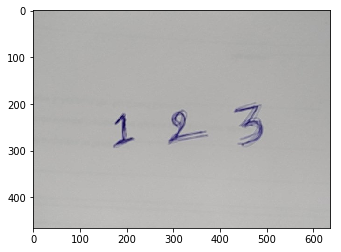

In [32]:
im = io.imread('./image.png')
print(im.shape)
plt.imshow(im) # plot the image in matplotlib coordinate axis

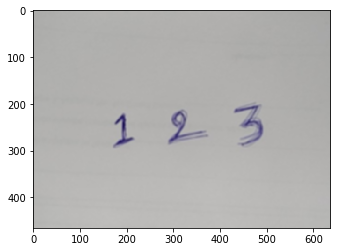

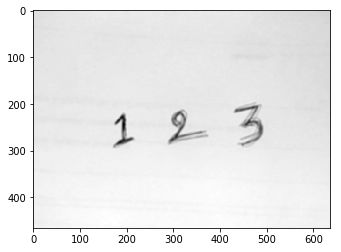

In [33]:
img = cv2.GaussianBlur(im,(5,5),10)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(0)
plt.imshow(img)
plt.figure(1)
plt.imshow(gray, cmap='gray')

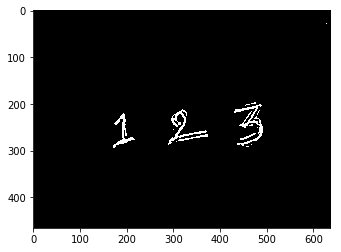

In [34]:
# In the Simple Thresholding, we used a global value as threshold value. But it may not be good in all
# the conditions where image has different lighting conditions in different areas. In that case, we go for
# adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image.
# So we get different thresholds for different regions of the same image and it gives us better results for images
# with varying illumination.

# Adaptive Method - It decides how thresholding value is calculated.

# cv.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
# cv.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values
# where weights are a gaussian window.

th = 255 - cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) # we subtracted it from 255 because because we want black where it is white and vice-versa
plt.imshow(th,cmap='gray')

# Morphological Transformations
#### Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play

## Erosion
#### The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).
#### So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

## Dilation
#### It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

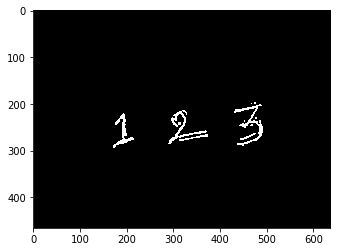

In [55]:
kim = th.copy()
kernel = np.ones((3,3))/9.0
a = cv2.dilate(kim, kernel, iterations=1)
plt.imshow(a,cmap='gray')
a = cv2.erode(a,kernel,iterations=1)
plt.imshow(a,cmap='gray')
a = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
a = cv2.morphologyEx(a, cv2.MORPH_CLOSE, kernel)
plt.imshow(a,cmap='gray')

# What are contours?
#### Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

#### 1. For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
#### 2. Since OpenCV 3.2, findContours() no longer modifies the source image but returns a modified image as the first of three return                parameters.
#### 3. In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be                      white and background should be black

In [51]:
image, cnts, _ = cv2.findContours(a, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda x: cv2.contourArea(x))
print(len(cnts))

12


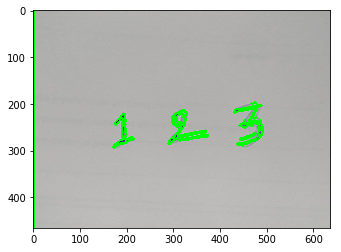

In [52]:
zxzx = im[:, :, :3].copy()
cv2.drawContours(zxzx, cnts, -1, (0,255,0), 3)

plt.imshow(zxzx)

(466, 637, 3) 0.0
683.5 (171, 221, 45, 74)
838.0 (289, 213, 82, 74)
923.0 (430, 202, 61, 88)
930.0 (0, 0, 3, 466)


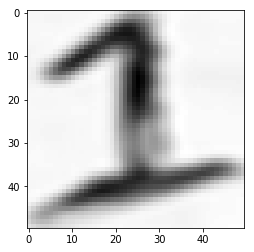

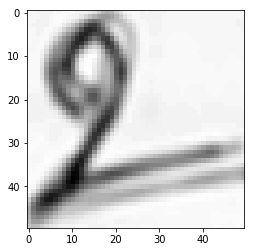

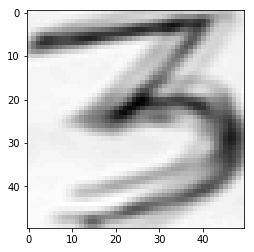

In [53]:
em = np.zeros(gray.shape + (3,), dtype=np.uint8)
print (em.shape, em.mean())
kk = 0
for ix in cnts:
    if cv2.contourArea(ix) > 500:
        print (cv2.contourArea(ix), cv2.boundingRect(ix))
        x, y, w, h = cv2.boundingRect(ix)
        if np.abs(w-h) < 150:
            plt.figure(kk)
            section = gray[y:y+h, x:x+w]
            section = cv2.resize(section, (50, 50))
            plt.imshow(section, cmap='gray')
            kk += 1
            cv2.drawContours(em, [ix], -1, (0, 255, 0), 3)

# plt.imshow(em)